<a href="https://colab.research.google.com/github/AveryGaoo/PRF_ProgrammingFoundations_notebooks/blob/main/LAB_06B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyjstat

In [7]:
import pandas as pd
import requests
from pyjstat import pyjstat
%matplotlib inline

In [32]:
BPSTAT_API_URL = "https://bpstat.bportugal.pt/data/v1"

In [9]:
series_id = 12519805

In [ ]:
url = f"{BPSTAT_API_URL}/series/?lang=EN&series_ids={series_id}"
series_info = requests.get(url).json()[0]
series_info

In [21]:
domain_id = series_info["domain_ids"][0]
dataset_id = series_info["dataset_id"]
domain_id, dataset_id

(21, 'ec7b2a0f066656833f1013b3a2f9f189')

In [ ]:
dataset_url = f"{BPSTAT_API_URL}/domains/{domain_id}/datasets/{dataset_id}/?lang=EN&series_ids={series_id}"
dataset = pyjstat.Dataset.read(dataset_url) #读取JSON-stat URL，返回pyjstat.Dataset对象
df = dataset.write('dataframe') #.write('dataframe')：把Dataset转成pandas DataFrame
df.head() #查看前几行，确认格式正确


In [ ]:
df[["Date", "value"]].plot(kind='line', x='Date', y='value', figsize=(16,10), marker='o', title='BPstat Series Data')


In [ ]:
series_id = 12533736
url = f"{BPSTAT_API_URL}/series/?lang=EN&series_ids={series_id}"
series_info = requests.get(url).json()[0]
domain_id = series_info["domain_ids"][0]
dataset_id = series_info["dataset_id"]
dataset_url = f"{BPSTAT_API_URL}/domains/{domain_id}/datasets/{dataset_id}/?lang=EN&series_ids={series_id}"
dataset = pyjstat.Dataset.read(dataset_url)
df = dataset.write('dataframe')
df[["Date", "value"]].plot(kind='line', x='Date', y='value', figsize=(16,
10), marker='o', title='BPstat Second Series')

In [39]:
import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt

class BPstatExplorer:
  BASE_URL = "https://bpstat.bportugal.pt/data/v1"

  def __init__(self, lang="EN"):
    """Initialize the BPstat explorer."""
    self.lang = lang

  def get_series_info(self, series_id):
    #根据给定的series_id，从BPstat API获取这条序列的元信息（metadata）
    """Retrieve metadata for a given series ID."""
    url = f"{self.BASE_URL}/series/?lang={self.lang}&series_ids={series_id}"
    response = requests.get(url).json()
    if not response:
      raise ValueError("Invalid series ID or no data found.")
    info = response[0]
    self.domain_id = info["domain_ids"][0]
    self.dataset_id = info["dataset_id"]
    self.series_name = info.get("label_en", "Unknown Series")
    return info

  def load_series(self, series_id):
    #把series_id对应的时间序列数据取回来，并转成pandasDataFrame格式，方便分析和画图
    """Load series data as a pandas DataFrame."""
    self.get_series_info(series_id) # Very Important, using before method
    dataset_url = (
      f"{self.BASE_URL}/domains/{self.domain_id}/datasets/{self.dataset_id}/"
      f"?lang={self.lang}&series_ids={series_id}"
    )
    dataset = pyjstat.Dataset.read(dataset_url)
    df = dataset.write('dataframe')
    self.df = df #把结果DataFrame保存成对象属性self.df,意义是：When need use plot_series(),不用你再传 df，just self.df is enough.
    return df

  def plot_series(self, title=None):
    #把刚刚取到的时间序列画成一个折线图
    """Plot the loaded series."""

    if not hasattr(self, 'df'):
      """如果直接bp.plot_series(),但之前没有调用 bp.load_series(...)，
         那么self.df是不存在的,这种情况下，方法会主动报错并告诉你：请先去加载数据
      """
      raise ValueError("No dataset loaded. Use load_series() first.")

    title = title or self.series_name

    self.df[["Date", "value"]].plot(
      kind='line', x='Date', y='value',
      figsize=(16, 8), marker='o', title=title
    )
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

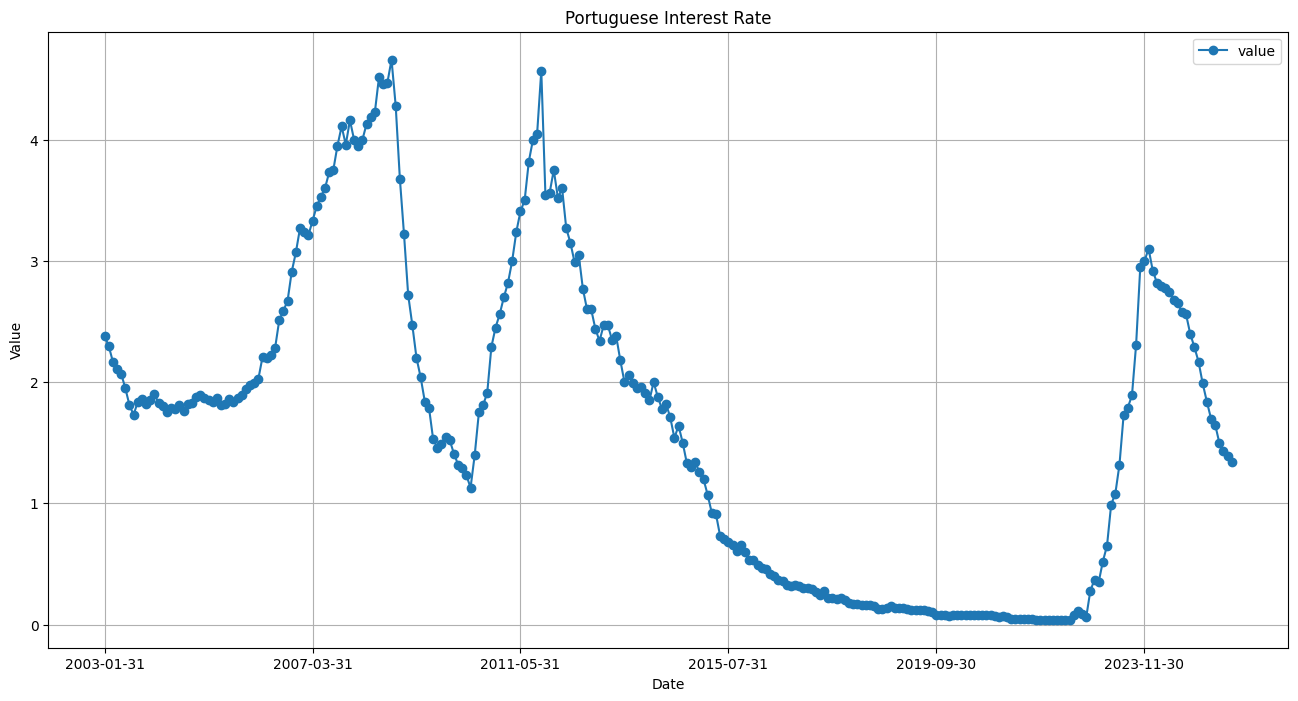

In [42]:
#test the class
bp = BPstatExplorer()

# Load first series
df1 = bp.load_series(12519805)
bp.plot_series("Portuguese Interest Rate")

In [ ]:
# Load another series
df2 = bp.load_series(12533736)
bp.plot_series("Portuguese Financial Indicator")

9.Discussion

1.What kind of economic indicators can be retrieved using BPstat?

Answer: Monetary and Financial; Monetary policy; Information about the banking system; External statistics; Globalization statistics; Non-financial sector debt; Public administrations;Balance sheet companies; Financial markets; Prices; Regional statistics...


2.How does the API structure differ from EuroStat?


3.How could the class be expanded (e.g., saving data locally, comparing multiple series)?

| 场景  | 设计目标       | 选择两列的理由        |
| --- | ---------- | -------------- |
| 单序列 | 不需要合并，只管画图 | 画图时临时选列就行      |
| 多序列 | 需要标准化后合并   | 必须统一列名、索引、时间格式 |


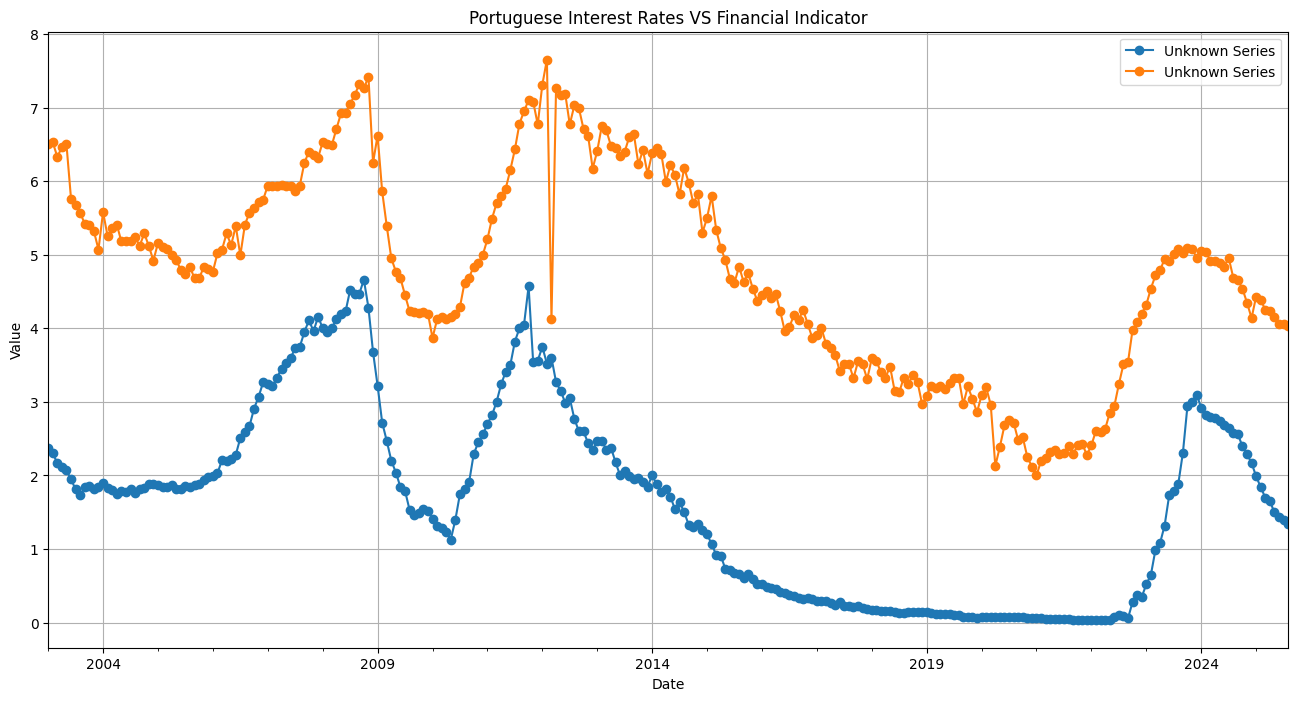

In [3]:
# Exercise 1:
# Accept multiple series IDs and plot them together.

import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt

class BPstatExplorer:
  BASE_URL = "https://bpstat.bportugal.pt/data/v1"

  def __init__(self, lang="EN"):
    """Initialize the BPstat explorer."""
    self.lang = lang

  def get_series_info(self, series_id):
    #根据给定的series_id，从BPstat API获取这条序列的元信息（metadata）
    """Retrieve metadata for a given series ID."""
    url = f"{self.BASE_URL}/series/?lang={self.lang}&series_ids={series_id}"
    response = requests.get(url).json()
    if not response:
      raise ValueError("Invalid series ID or no data found.")
    info = response[0]
    self.domain_id = info["domain_ids"][0]
    self.dataset_id = info["dataset_id"]
    self.series_name = info.get("label_en", "Unknown Series")
    return info

  def load_series_multiple(self, series_ids, join='outer'):
    list_dfs = []
    for series_id in series_ids:
      self.get_series_info(series_id)
      dataset_url = (
        f"{self.BASE_URL}/domains/{self.domain_id}/datasets/{self.dataset_id}/"
        f"?lang={self.lang}&series_ids={series_id}"
      )
      dataset = pyjstat.Dataset.read(dataset_url)
      df = dataset.write('dataframe')

      """如果我们把整个df直接拼起来，
         后面多个序列concat时就会出现同名的多余列，列重复、结构冲突，很乱。"""
      df = df[['Date', 'value']].copy()
      df['Date'] = pd.to_datetime(df['Date']) #把Date这一列从字符串转换成真正的时间类型
      df = df.set_index('Date') #以后我们拿多个不同的序列并把它们拼在一起时,把Date这一列作为索引
      label = getattr(self, 'series_name', str(series_id)) #尝试从self（当前对象）上读取属性series_name；
                                                           #如果这个属性不存在（例如用户没先调用get_series_info()，
                                                           #或者信息缺失），那就退而求其次，用str(sid)，也就是用序列号本身当名字。
      df.rename(columns={'value': label}, inplace=True)
      list_dfs.append(df)

    df_wide =pd.concat(list_dfs, axis=1, join=join).sort_index()
    self.df = df_wide
    return df_wide

  def plot_series_multiple(self, title=None):
    """Plot the loaded series."""

    if not hasattr(self, 'df'):
      raise ValueError("No dataset loaded. Use load_series() first.")

    title = title or 'Multiple BPstat Series'

    self.df.plot(
      kind='line', figsize=(16, 8), marker='o', title=title
    )
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

bp = BPstatExplorer()
df_multi = bp.load_series_multiple([12519805, 12533736])
bp.plot_series_multiple("Portuguese Interest Rates VS Financial Indicator")


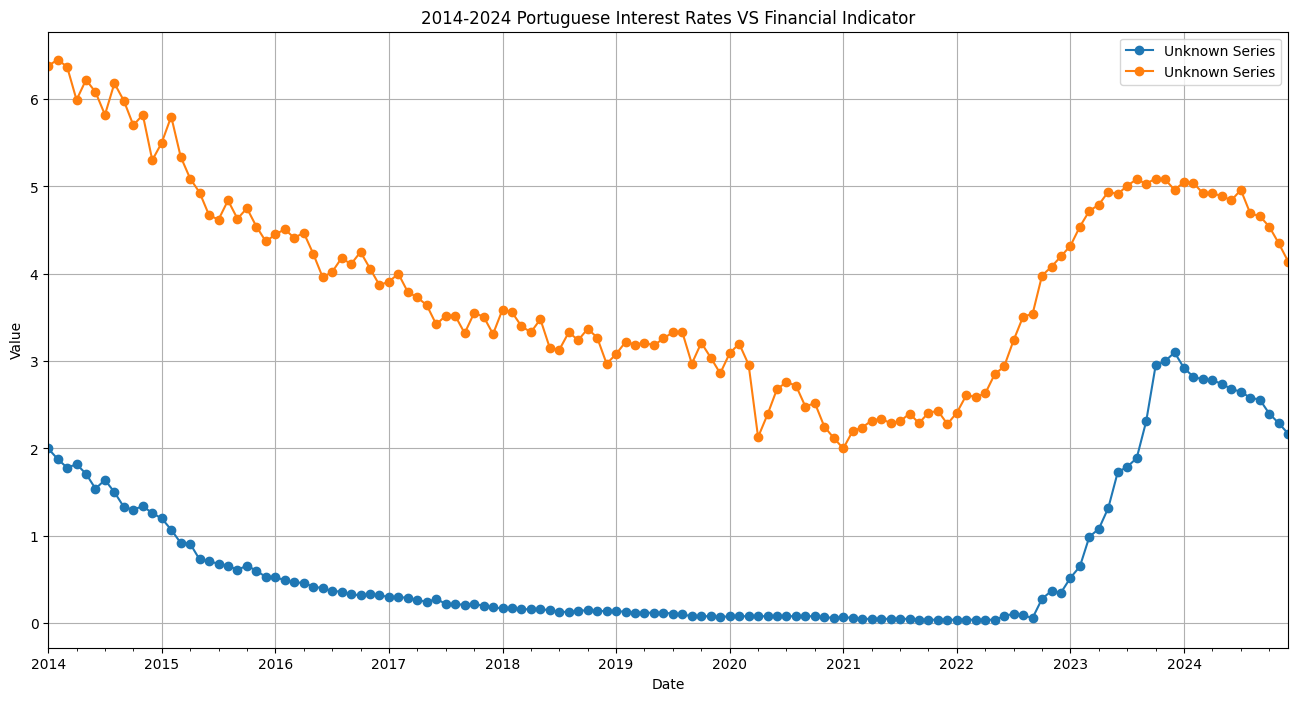

In [7]:
# Exercise 2:
# Allow filtering data by date range.

import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt

class BPstatExplorer:
  BASE_URL = "https://bpstat.bportugal.pt/data/v1"

  def __init__(self, lang="EN"):
    """Initialize the BPstat explorer."""
    self.lang = lang

  def get_series_info(self, series_id):
    #根据给定的series_id，从BPstat API获取这条序列的元信息（metadata）
    """Retrieve metadata for a given series ID."""
    url = f"{self.BASE_URL}/series/?lang={self.lang}&series_ids={series_id}"
    response = requests.get(url).json()
    if not response:
      raise ValueError("Invalid series ID or no data found.")
    info = response[0]
    self.domain_id = info["domain_ids"][0]
    self.dataset_id = info["dataset_id"]
    self.series_name = info.get("label_en", "Unknown Series")
    return info

  def load_series_multiple(self, series_ids, join='outer'):
    list_dfs = []
    for series_id in series_ids:
      self.get_series_info(series_id)
      dataset_url = (
        f"{self.BASE_URL}/domains/{self.domain_id}/datasets/{self.dataset_id}/"
        f"?lang={self.lang}&series_ids={series_id}"
      )
      dataset = pyjstat.Dataset.read(dataset_url)
      df = dataset.write('dataframe')

      """如果我们把整个df直接拼起来，
         后面多个序列concat时就会出现同名的多余列，列重复、结构冲突，很乱。"""
      df = df[['Date', 'value']].copy()
      df['Date'] = pd.to_datetime(df['Date']) #把Date这一列从字符串转换成真正的时间类型
      df = df.set_index('Date') #以后我们拿多个不同的序列并把它们拼在一起时,把Date这一列作为索引
      label = getattr(self, 'series_name', str(series_id)) #尝试从self（当前对象）上读取属性series_name；
                                                           #如果这个属性不存在（例如用户没先调用get_series_info()，
                                                           #或者信息缺失），那就退而求其次，用str(sid)，也就是用序列号本身当名字。
      df.rename(columns={'value': label}, inplace=True)
      list_dfs.append(df)

    df_wide =pd.concat(list_dfs, axis=1, join=join).sort_index()
    self.df = df_wide
    return df_wide

  def plot_series_multiple(self, title=None):
    """Plot the loaded series."""

    if not hasattr(self, 'df'):  #检查这个对象self有没有一个名为df的属性；
      raise ValueError("No dataset loaded. Use load_series() first.")

    title = title or 'Multiple BPstat Series'

    self.df.plot(
      kind='line', figsize=(16, 8), marker='o', title=title
    )
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

  def filter_date(self, start_date, end_date):
    if not hasattr(self, 'df'):
      raise ValueError("No data loaded. Use load_series() first.")

    df = self.df

    if not isinstance(df.index, pd.DatetimeIndex):
      if 'Date' in df.columns:
        df = df.copy()
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date').sort_index()
      else:
        raise ValueError("DataFrame index is not DatetimeIndex and no Date column was found...")

    if start_date and end_date:
      filtered = df.loc[pd.to_datetime(start_date):pd.to_datetime(end_date)]
    elif start_date:
      filtered = df.loc[pd.to_datetime(start_date):]
    elif end_date:
      filtered = df.loc[:pd.to_datetime(end_date)]
    else:
      filtered = df

    self.df = filtered
    return filtered  #why here return: for use it externally;

bp = BPstatExplorer()
df_multi = bp.load_series_multiple([12519805, 12533736])
df_filtered = bp.filter_date("2014-01-01", "2024-12-31")
bp.plot_series_multiple("2014-2024 Portuguese Interest Rates VS Financial Indicator")


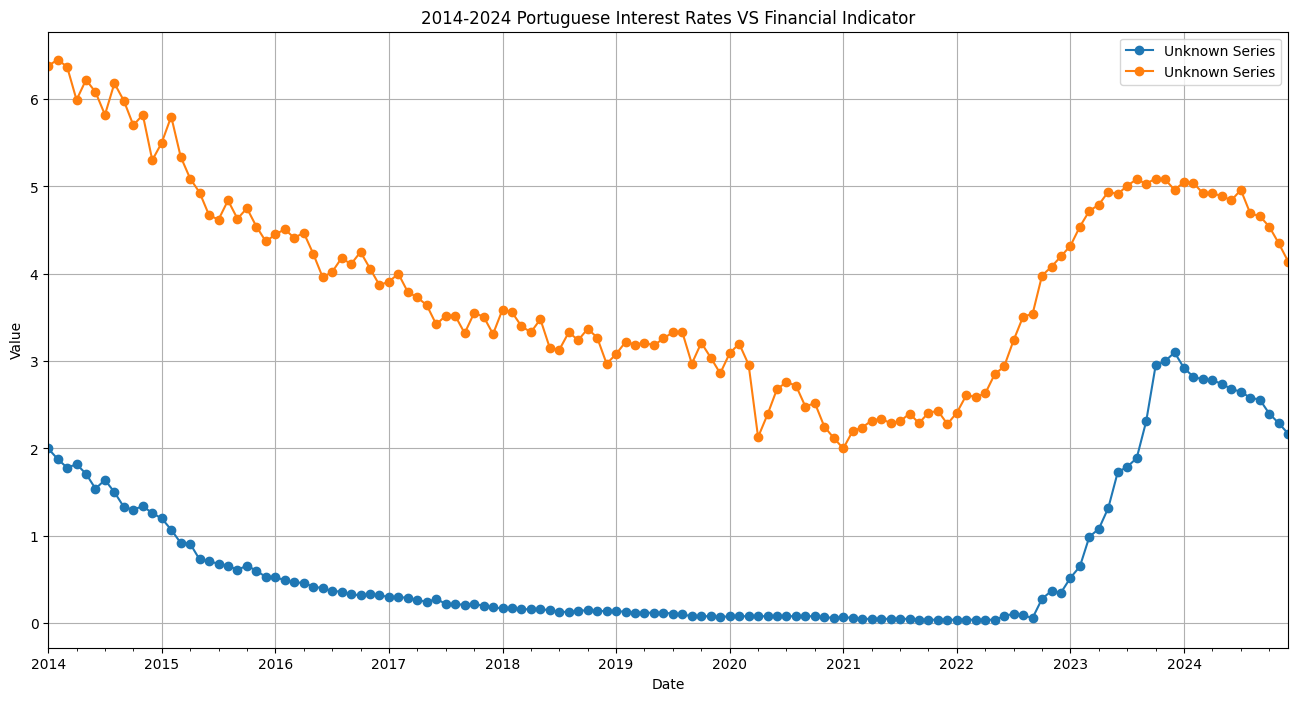

Data save to test_bpstat.csv


In [8]:
#Exercise 3:
# Export retrieved data to a CSV file.

import pandas as pd
import requests
from pyjstat import pyjstat
import matplotlib.pyplot as plt

class BPstatExplorer:
  BASE_URL = "https://bpstat.bportugal.pt/data/v1"

  def __init__(self, lang="EN"):
    """Initialize the BPstat explorer."""
    self.lang = lang

  def get_series_info(self, series_id):
    #根据给定的series_id，从BPstat API获取这条序列的元信息（metadata）
    """Retrieve metadata for a given series ID."""
    url = f"{self.BASE_URL}/series/?lang={self.lang}&series_ids={series_id}"
    response = requests.get(url).json()
    if not response:
      raise ValueError("Invalid series ID or no data found.")
    info = response[0]
    self.domain_id = info["domain_ids"][0]
    self.dataset_id = info["dataset_id"]
    self.series_name = info.get("label_en", "Unknown Series")
    return info

  def load_series_multiple(self, series_ids, join='outer'):
    list_dfs = []
    for series_id in series_ids:
      self.get_series_info(series_id)
      dataset_url = (
        f"{self.BASE_URL}/domains/{self.domain_id}/datasets/{self.dataset_id}/"
        f"?lang={self.lang}&series_ids={series_id}"
      )
      dataset = pyjstat.Dataset.read(dataset_url)
      df = dataset.write('dataframe')

      """如果我们把整个df直接拼起来，
         后面多个序列concat时就会出现同名的多余列，列重复、结构冲突，很乱。"""
      df = df[['Date', 'value']].copy()
      df['Date'] = pd.to_datetime(df['Date']) #把Date这一列从字符串转换成真正的时间类型
      df = df.set_index('Date') #以后我们拿多个不同的序列并把它们拼在一起时,把Date这一列作为索引
      label = getattr(self, 'series_name', str(series_id)) #尝试从self（当前对象）上读取属性series_name；
                                                           #如果这个属性不存在（例如用户没先调用get_series_info()，
                                                           #或者信息缺失），那就退而求其次，用str(sid)，也就是用序列号本身当名字。
      df.rename(columns={'value': label}, inplace=True)
      list_dfs.append(df)

    df_wide =pd.concat(list_dfs, axis=1, join=join).sort_index()
    self.df = df_wide
    return df_wide

  def plot_series_multiple(self, title=None):
    """Plot the loaded series."""

    if not hasattr(self, 'df'):  #检查这个对象self有没有一个名为df的属性；
      raise ValueError("No dataset loaded. Use load_series() first.")

    title = title or 'Multiple BPstat Series'

    self.df.plot(
      kind='line', figsize=(16, 8), marker='o', title=title
    )
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

  def filter_date(self, start_date, end_date):
    if not hasattr(self, 'df'):
      raise ValueError("No data loaded. Use load_series() first.")

    df = self.df

    if not isinstance(df.index, pd.DatetimeIndex):
      if 'Date' in df.columns:
        df = df.copy()
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date').sort_index()
      else:
        raise ValueError("DataFrame index is not DatetimeIndex and no Date column was found...")

    if start_date and end_date:
      filtered = df.loc[pd.to_datetime(start_date):pd.to_datetime(end_date)]
    elif start_date:
      filtered = df.loc[pd.to_datetime(start_date):]
    elif end_date:
      filtered = df.loc[:pd.to_datetime(end_date)]
    else:
      filtered = df

    self.df = filtered
    return filtered  #why here return: for use it externally;

  def save_to_csv(self, filme_name, include_index=True):
    if not hasattr(self, 'df'):  #检查这个对象上有没有名为'df'的属性
      raise ValueError("No data. Use load_series() first.")

    self.df.to_csv(filme_name, index=include_index)
    print(f"Data save to {filme_name}")

bp = BPstatExplorer()
df_multi = bp.load_series_multiple([12519805, 12533736])
df_filtered = bp.filter_date("2014-01-01", "2024-12-31")
bp.plot_series_multiple("2014-2024 Portuguese Interest Rates VS Financial Indicator")
bp.save_to_csv("test_bpstat.csv")


In [ ]:
#can using this code to dowload:
#from google.colab import files
#files.download("mydata.csv")